# Peer to Peer lending
*Peer-to-peer (P2P) lending is a financial practice that enables individuals to lend money directly to other individuals or businesses without the involvement of traditional financial institutions, in this notebook we will study the default risk related to the p2p lending using Bondora data*

# Part I - Prosper Loan Data Exploration 
### By Omaima Younes

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

## 1. Importing Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Loading the data

In [103]:
# Load the dataset 
df = pd.read_csv('prosperLoanData.csv')

# Display the first few rows to check the structure
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [104]:
#display the shape of the data
df.shape

(113937, 81)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [106]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

# 1. Exploratory Data Analysis (EDA):

#### Target Variable Labeling
here we want to transform The Loan Status column into a binary target variable 1 (Default)0 (Not Default)

##### Step 1: Handle ClosedDate

If a loan has a ClosedDate, it means the loan was paid off → Non-Defaulted (0)

If ClosedDate is missing, it means the loan is still active → Further checks needed

##### Step 2: Handle LoanCurrentDaysDelinquent

If a loan is delinquent for more than 180 days, it should be marked as Defaulted (1)

If it's delinquent for 180 days or less, we keep the existing status

In [107]:
# Step 1: Initialize the "Status" column based on ClosedDate
# If ClosedDate is present, mark as 0 (Non-Defaulted), otherwise 1 (Defaulted)
df["LoanStatus"] = df["ClosedDate"].apply(lambda x: 0 if pd.notnull(x) else 1)

# Step 2: Update based on LoanCurrentDaysDelinquent
# If the loan is delinquent for more than 180 days, mark as Defaulted (1)
df["LoanStatus"] = df.apply(lambda row: 1 if row["LoanCurrentDaysDelinquent"] > 180 else row["LoanStatus"], axis=1)

# Quick check of the results
print(df["LoanStatus"].value_counts())


LoanStatus
1    73911
0    40026
Name: count, dtype: int64


In [108]:
# Check for missing values
missing_values = df.isnull().sum()
print("\n🛑 Missing Values Per Column:")
print(missing_values[missing_values > 0])


🛑 Missing Values Per Column:
CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
Tota

In [109]:
#Handle missing values by imputing with the median (for numeric columns)
df.fillna(df.median(numeric_only=True), inplace=True)
#Handle missing values by imputing with the most frequent category (for categorical columns).
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [110]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values[missing_values > 0] is True:
    print("\n🛑 Missing Values Per Column:")
    print(missing_values[missing_values > 0])
else :
    print("no messing value :)")

no messing value :)


In [111]:
#Remove duplicates to ensure data consistency
df.drop_duplicates(inplace=True)

In [112]:
#Convert columns like dates to their appropriate data types (e.g., datetime).
date_columns = ["ListingCreationDate", "ClosedDate", "FirstRecordedCreditLine",'DateCreditPulled','LoanOriginationDate']  # dates columns
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113550 non-null  datetime64[ns]
 3   CreditGrade                          113937 non-null  object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  int64         
 6   ClosedDate                           113917 non-null  datetime64[ns]
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [114]:
# Compute summary statistics
print("\n📈 Summary Statistics:")
print(df.describe())


📈 Summary Statistics:
       ListingNumber            ListingCreationDate           Term  \
count   1.139370e+05                         113550  113937.000000   
mean    6.278857e+05  2011-07-09 15:18:33.127323648      40.830248   
min     4.000000e+00     2005-11-09 20:44:28.847000      12.000000   
25%     4.009190e+05  2008-09-19 20:21:12.676499968      36.000000   
50%     6.005540e+05  2012-06-16 12:33:55.665000192      36.000000   
75%     8.926340e+05  2013-09-10 06:24:16.660250112      36.000000   
max     1.255725e+06     2014-03-10 12:20:53.760000      60.000000   
std     3.280762e+05                            NaN      10.436212   

          LoanStatus                     ClosedDate    BorrowerAPR  \
count  113937.000000                         113917  113937.000000   
mean        0.648701  2012-09-22 05:37:13.847450368       0.218826   
min         0.000000            2005-11-25 00:00:00       0.006530   
25%         0.000000            2011-05-12 00:00:00       0.156290

In [115]:
#delete unused columns
# Define features of interest for this analysis
features = ['ListingNumber','ListingCreationDate','ProsperRating (Alpha)','ProsperScore',\
            'ListingCategory (numeric)', 'Occupation','EmploymentStatus', \
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', \
            'IncomeVerifiable', 'LoanOriginalAmount', 'LoanStatus', \
            'CreditScoreRangeLower', 'CreditScoreRangeUpper','BorrowerState', \
            'LoanOriginationDate', 'IncomeRange','BorrowerAPR','BorrowerRate','StatedMonthlyIncome','Term']

In [116]:
# New subdataset
df_selected=df[features]
df_selected.head()

,ListingNumber,ListingCreationDate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,...,LoanStatus,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerState,LoanOriginationDate,IncomeRange,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term
0,193129,2007-08-26 19:09:29.263,C,6.0,0,Other,Self-employed,True,5.0,1,...,0,640.0,659.0,CO,2007-09-12,"$25,000-49,999",0.16516,0.1580,3083.333333,36
1,1209647,2014-02-27 08:28:07.900,A,7.0,2,Professional,Employed,False,14.0,13,...,1,680.0,699.0,CO,2014-03-03,"$50,000-74,999",0.12016,0.0920,6125.000000,36
2,81716,2007-01-05 15:00:47.090,C,6.0,0,Other,Not available,False,10.0,0,...,0,480.0,499.0,GA,2007-01-17,Not displayed,0.28269,0.2750,2083.333333,36
3,658116,2012-10-22 11:02:35.010,A,9.0,16,Skilled Labor,Employed,True,5.0,7,...,1,800.0,819.0,GA,2012-11-01,"$25,000-49,999",0.12528,0.0974,2875.000000,36
4,909464,2013-09-14 18:38:39.097,D,4.0,2,Executive,Employed,True,19.0,6,...,1,680.0,699.0,MN,2013-09-20,"$100,000+",0.24614,0.2085,9583.333333,36


In [117]:
df_selected.columns

Index(['ListingNumber', 'ListingCreationDate', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentCreditLines',
       'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'IncomeVerifiable',
       'LoanOriginalAmount', 'LoanStatus', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'BorrowerState', 'LoanOriginationDate',
       'IncomeRange', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome',
       'Term'],
      dtype='object')

### Vusialization

#### Step 1: Create Subplots for Numerical Features (Histograms + KDE)

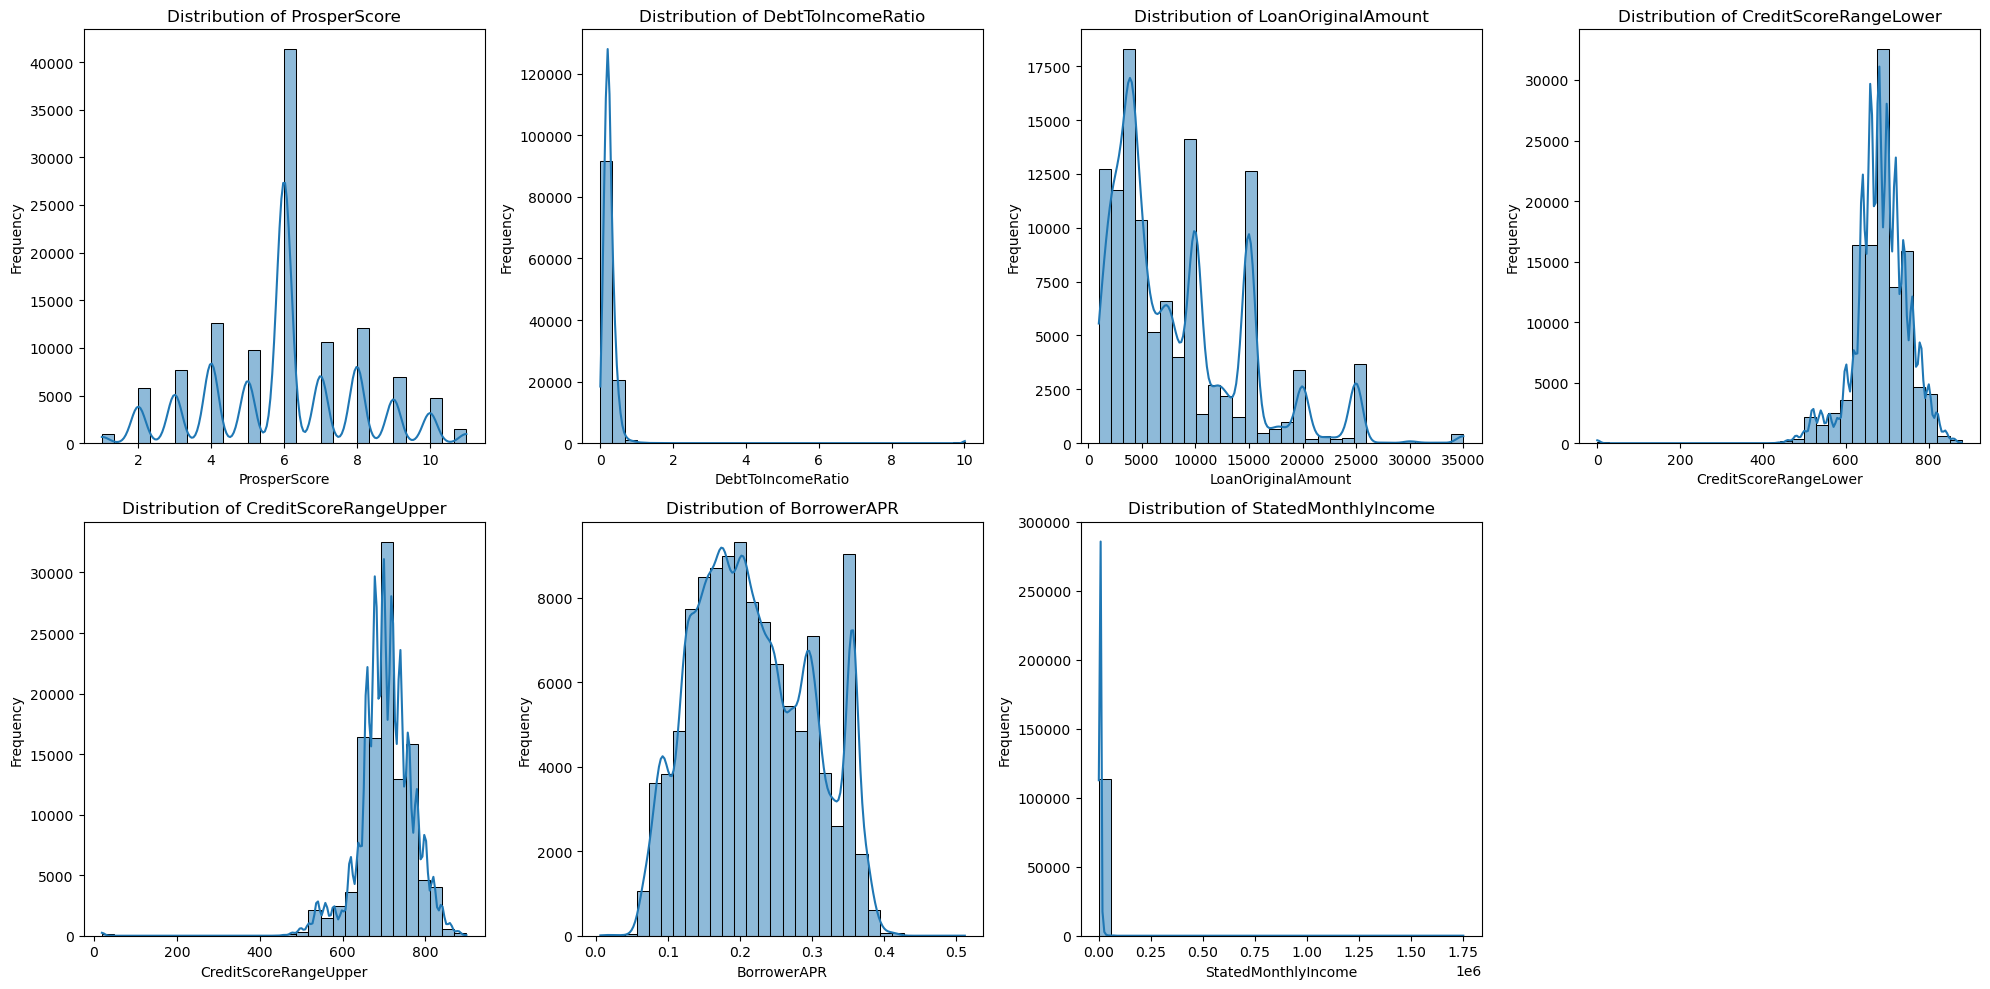

In [118]:

# Select numerical features
numerical_features = [
    'ProsperScore', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'CreditScoreRangeLower',
    'CreditScoreRangeUpper', 'BorrowerAPR', 'StatedMonthlyIncome'
]

# Calculate rows and columns dynamically
n_features = len(numerical_features)
n_cols = 4  # Keep 4 columns
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot histograms + KDE
for i, feature in enumerate(numerical_features):
    sns.histplot(df_selected[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):  
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout
plt.show()


#### Note

1. **ProsperScore**: This score is likely a credit risk rating. The distribution is multimodal, meaning it has multiple peaks, possibly indicating different borrower categories.

2. **DebtToIncomeRatio**: The distribution is heavily right-skewed, meaning most borrowers have a low debt-to-income ratio, but some have extremely high values.

3. **LoanOriginalAmount**: The distribution is right-skewed, showing that most loans are smaller, but some borrowers take significantly larger loans.

4. **CreditScoreRangeLower**: This distribution is roughly normal but skewed slightly to the left. Most borrowers have credit scores in the 600-800 range.

5. **CreditScoreRangeUpper**: Similar to the lower range, this distribution follows a normal pattern, with most borrowers having scores between 600 and 800.

6. **BorrowerAPR**: This distribution appears to be bimodal, meaning there are two peaks, possibly indicating different borrower risk levels or loan types.

7. **StatedMonthlyIncome**: The distribution is extremely right-skewed, with most borrowers having low monthly incomes, but a few having exceptionally high incomes.



# Univariate Data Analysis:

##### Loan Status

I will begin by plotting the loan status to get an idea of this variable's distribution.

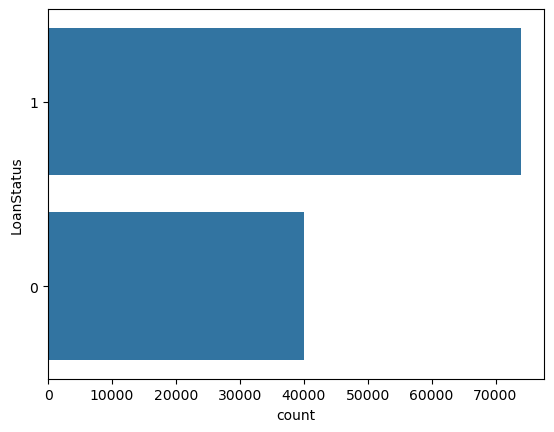

In [119]:
# Plot loan status
color_base=sns.color_palette()[0]

# Order the categorical variable 
status_order=df_selected.LoanStatus.value_counts().index

# Plot 
sns.countplot(data=df_selected, y='LoanStatus', order=status_order, color=color_base);

#### Note
As we have already converted the LoanState to a binary variable 0 for non defaulted and 1 for defaulted .

So this plot shows us that most borrowers have faild to pay the loan so they are in a serious delinquency.
his would mean that default is a common outcome in the dataset, highlighting potential risks or challenges in the loan repayment process for this particular group of borrowers.

##### Prosper's borrowers risk

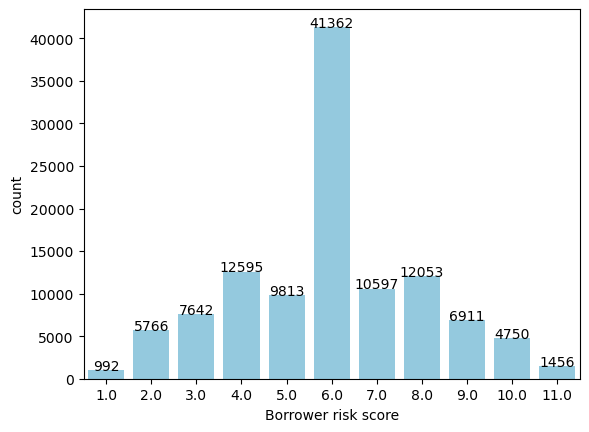

In [120]:
#Plot ordinal variable distribution 'ProsperScore'
sns.countplot(data=df_selected, x='ProsperScore', color='skyblue');
plt.xlabel('Borrower risk score');
locs, labels = plt.xticks()
cat_counts = df_selected['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

### Note
Prosper Score was built using historical Prosper data to assess the risk of Prosper borrower listings. It ranges from 1 to 11, with 11 being the lowest risk, to 1 being the highest risk.

The figure above shows Prosper Score has a bell-shaped distribution spiking on Score with 6 , then 4, and 8  and fewer counts with scores in both lowest and highest risk among the Prosper data.


##### Debt to Income Ratio

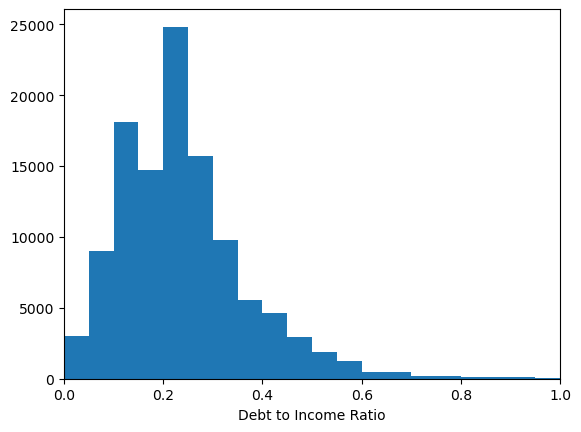

In [121]:
# Plot DebtToIncomeRatio
binsize = 0.05
bins = np.arange(0, df_selected['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df_selected, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1);

### Note 
In general, higher Debt To Income Ratio demonstrates that an individual has too much debt for the amount of income. Inversely, lower DebtToIncomeRatio means a good balance between debt and income. It appears from the figure above that most borrowers who applied for a loan have a debt to income ratio around 30%.

##### Employment Status

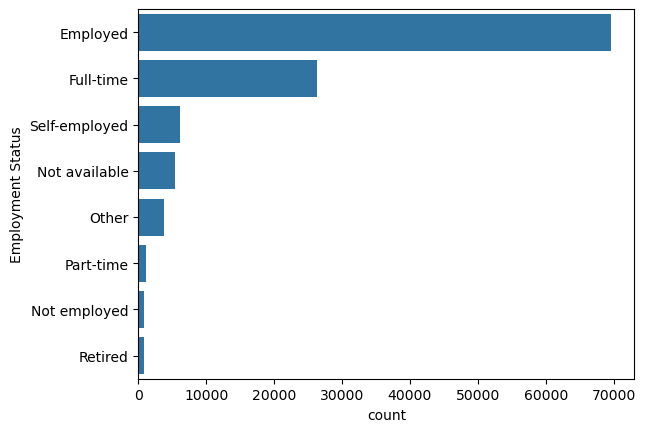

In [123]:
# Plot EmploymentStatus
status_empl=df_selected.EmploymentStatus.value_counts().index
sns.countplot(data=df_selected, y='EmploymentStatus', order=status_empl, color=color_base)
plt.ylabel('Employment Status');

### Note
The majority of borrowers are employed, which is evident because it wouldnt be easy to get a loan without a job. To dig further, i will investigate in the next part what are their occupations.

### Occupation (sized by frequency)

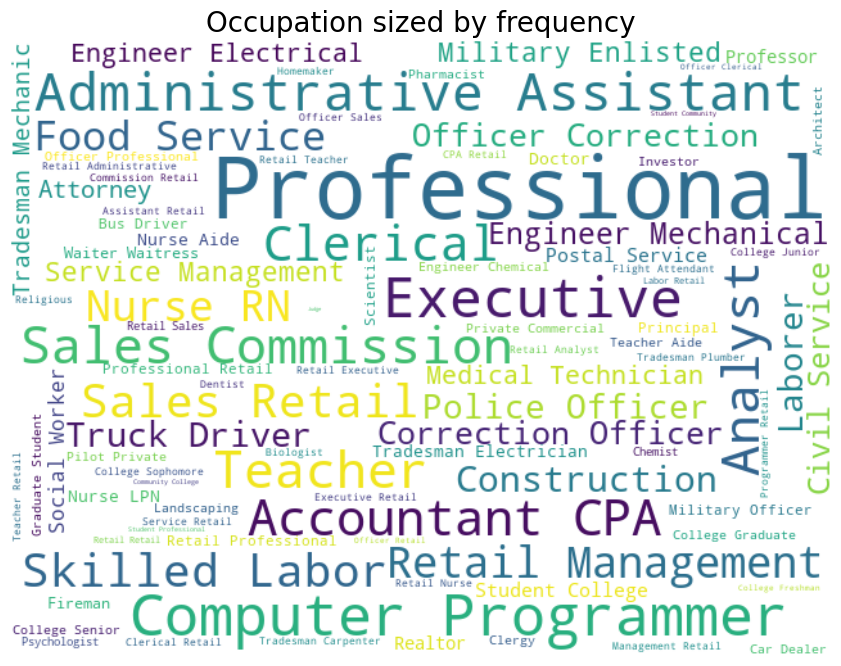

In [129]:
from wordcloud import WordCloud, STOPWORDS

# Concatenate all occupations into a single string
text = df_selected.loc[:, 'Occupation'].str.cat(others=None, sep=' ')

# Instantiate word cloud object without a mask
wc = WordCloud(background_color='white', 
               max_words=200, 
               stopwords=STOPWORDS,
               width=640, 
               height=480,
               contour_width=0.01, 
               contour_color='green')

# Generate word cloud
wc.generate(text)

# Show word cloud
plt.figure(figsize=[12, 8])
plt.imshow(wc, interpolation='bilinear')
plt.title('Occupation sized by frequency', fontsize=20)
plt.axis('off')  # Hide axis
plt.show()


### Note
Most borrowers on Prosper indicate to be Professional, Computer Programmer, Administrative Assistant, Executive, Teacher, Analyst... All those people have chosen to borrow on Prosper instead of going to the conventional way and borrow from their commerciaL bank. This is could be due to an attractive interest rate offered for this categories of people. 

### Loan categories

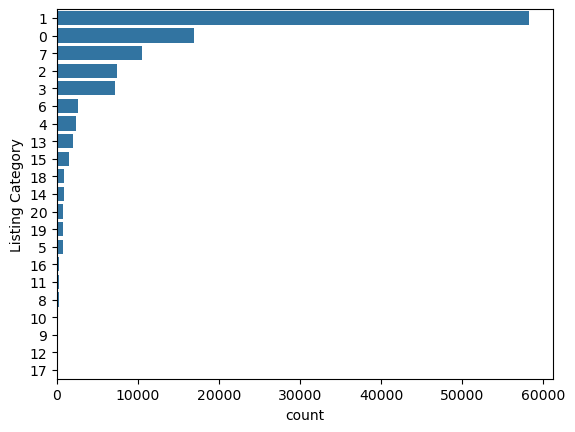

In [133]:
# loan purpose by category
categ_order = df_selected[ 'ListingCategory (numeric)'].value_counts().index
listing_counts = df_selected[ 'ListingCategory (numeric)'].value_counts()
sns.countplot(data = df_selected, y =  'ListingCategory (numeric)', color = color_base, order=categ_order)
plt.ylabel('Listing Category');

### Note
Debt consolidation won by a very huge amount. It is the most popular type of Prosper's loans. It's not really surprising! Business and some Personal loans are other notable categories in the loans by Listing Categories.

### Loan Original Amount

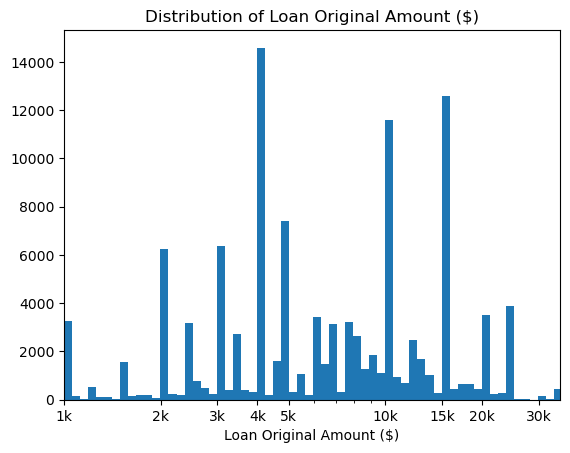

In [134]:
# plot the loan original amount against a log scale because it has a long tail
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(df_selected['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df_selected, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

### Notes

As we can see, there are three peaks at 4K, 10K, and 15K. It seems that these three loan sizes are the most common ones that people took out.

### Term of Loans

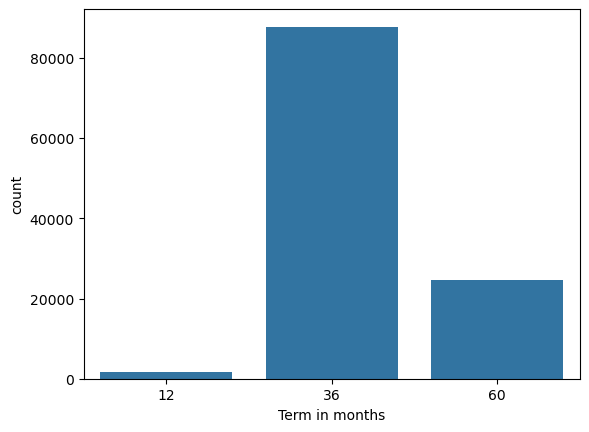

In [136]:
# Plot term of loans
sns.countplot(data=df_selected, x='Term', color=color_base)
plt.xlabel('Term in months');


### Notes

We have short term loans: 1 year, Medium term loans 3 and 5 years. The most common type is a 3-year loan (medium term) followed by 5 year loan. The short term loan is very rare.

### Wage Group

C:\Users\HP\AppData\Local\Temp\ipykernel_33180\3216145078.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['WageGroup'] = df_selected.apply(classify, axis=1)
C:\Users\HP\AppData\Local\Temp\ipykernel_33180\3216145078.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['WageGroup'] = df_selected['WageGroup'].astype(ordered_variabl)


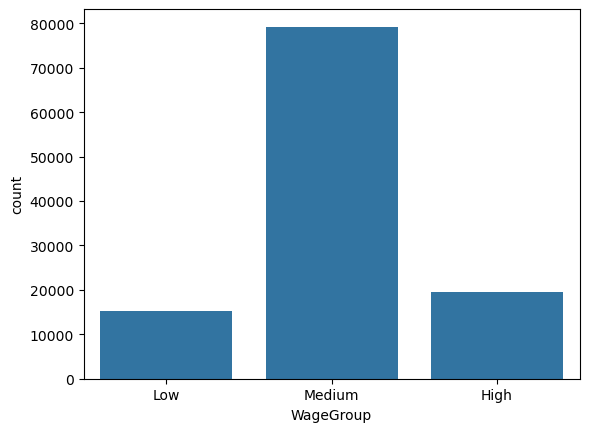

In [146]:
# define a classification function
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'
    
df_selected['WageGroup'] = df_selected.apply(classify, axis=1)

# convert string to ordinal category type
ordinal_class = ['Low', 'Medium', 'High']
ordered_variabl = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
df_selected['WageGroup'] = df_selected['WageGroup'].astype(ordered_variabl)

# Plot the new variable
sns.countplot(data = df_selected, x = 'WageGroup', color = color_base);

The majority of people who have taken out credit are in the middle class and have an average monthly salary between 2500 dollars and 8000 dollars.

# Bivariate Data Analysis:
To start off with, I want to look at the pairwise correlations present between features in the data. I will investigate the relationships between numerical variables to see if any particular pairs have strong correlations

In [137]:
# Numerical features
numeric_vars = [ 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']

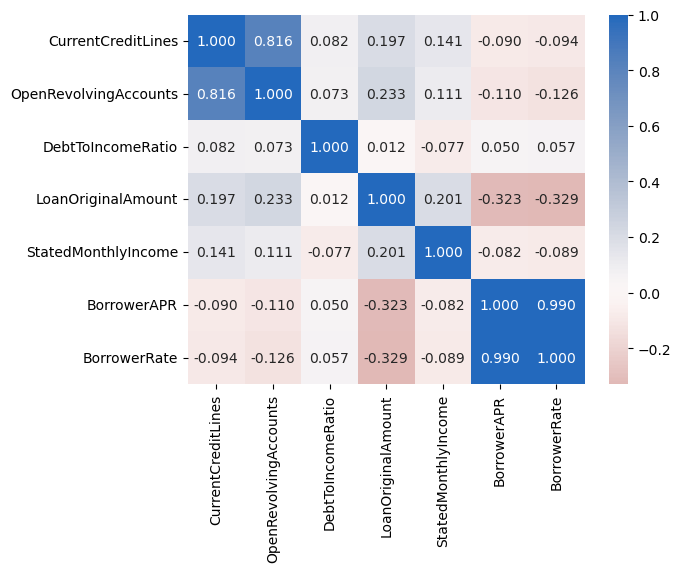

In [138]:
# correlation plot
sns.heatmap(df_selected[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center=0)
plt.show()

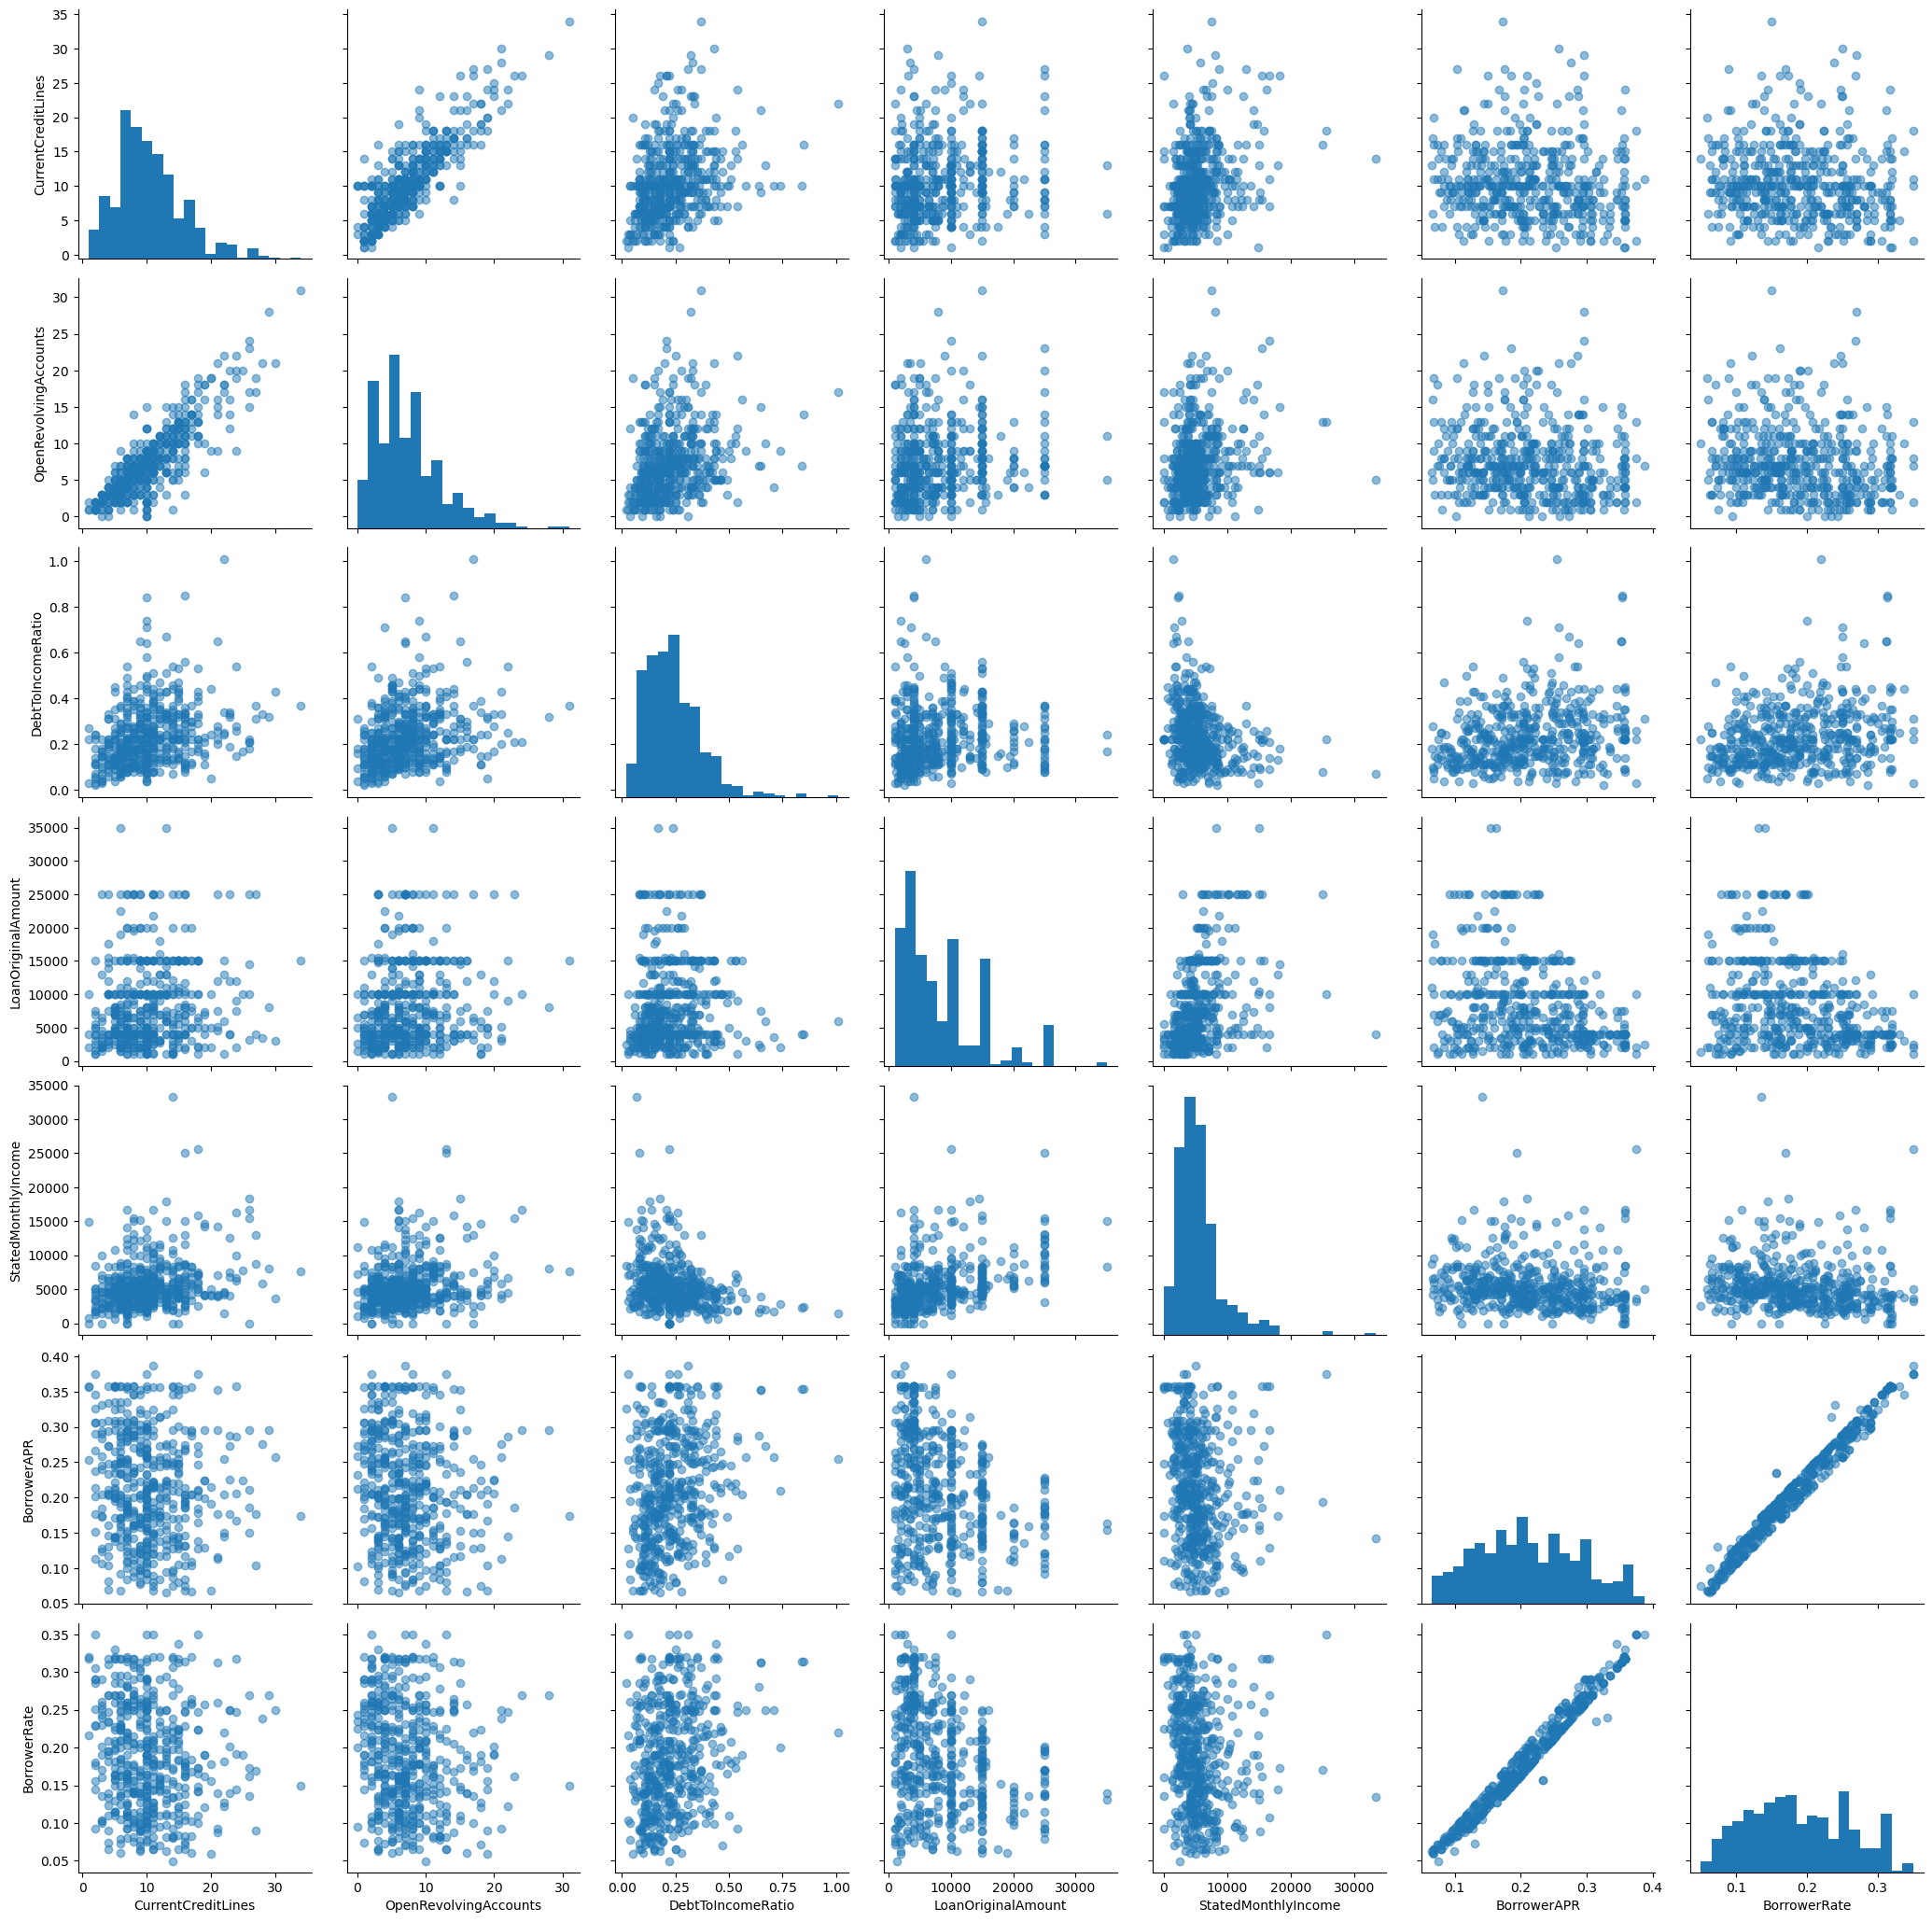

In [141]:
# plot matrix: sample 500 loans so that plots are clearer
samples = np.random.choice(df_selected.shape[0], 500, replace=False)
df_samp = df_selected.reindex(samples)

# pair grid
g = sns.PairGrid(data=df_samp, vars=numeric_vars, height=3)  # Use 'height' instead of 'size'
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=1/2)




_**Notes**_

- As expected, the CurrentCreditLines and OpenRevolvingAccounts are highly and positively correlated with one another .The second strong relationship is between BorrowerRate and Borrower APR (correlation coefficient of 0.993). 

- Moreover, there is a moderate and negative correlation between interest rate and Loan amount. 

- On the other hand, most of the remaining variables doesn't present a strong correlation.

Let's move on to look at how these numerical variables correlate with the categorical and ordinal variables.

### Relation between Borrower Rate and employment status, Collatera and Wage Group

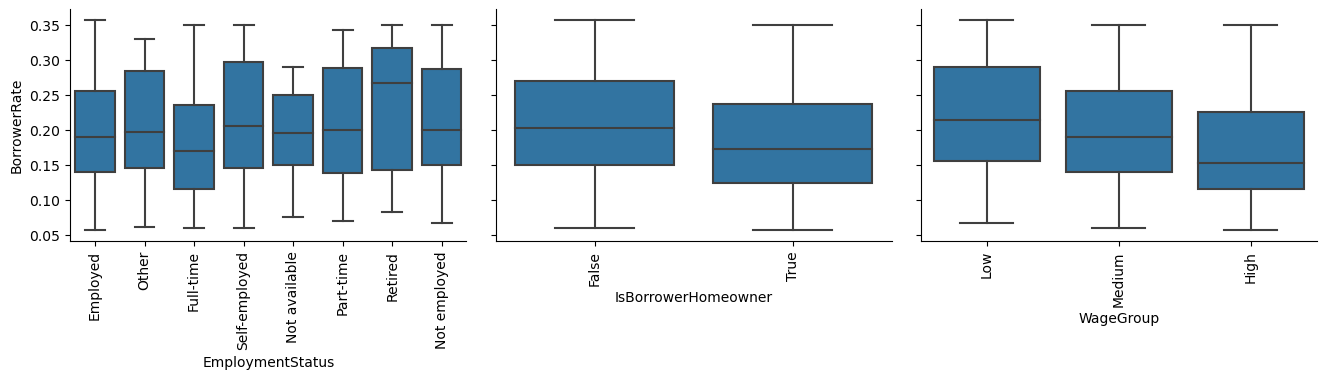

In [147]:
# Sample 2000 rows
df_samp = df_selected.sample(2000, replace=False)

# Define boxgrid function
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation=90)

# Fix the PairGrid syntax
g = sns.PairGrid(
    data=df_samp, 
    y_vars=['BorrowerRate'], 
    x_vars=['EmploymentStatus', 'IsBorrowerHomeowner', 'WageGroup'], 
    height=3, aspect=1.5  # 
)

g.map(boxgrid)
plt.show()


_**Notes**_

As expected, it appears that there are some negative relationships between the categorical/ordinal variables selected and the interest rate. 
Unemployed people have more restrictive credit condition (higher rate) than the people who have jobs. 

The second observation is that borrowers who have collaterals(or homeowners) have lower rates than those who doesn't have any collateral(house).

Similarly, borrowers with higher monthly salaries tend to get a lower lending interest rate. So it's a good determinant as well.

### Relation between Borrower Rate and Prosper Score, Prosper Rating

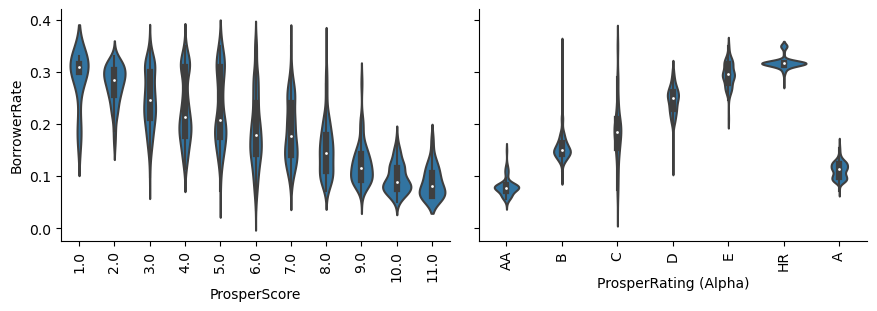

In [156]:
#Define violin function correctly
def violin(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.violinplot(x=x, y=y, color=default_color)  
    plt.xticks(rotation=90)

# Sample 2000 rows
df_samp = df_selected.sample(2000, replace=False)

# Create PairGrid
g = sns.PairGrid(
    data=df_samp, 
    y_vars=['BorrowerRate'], 
    x_vars=['ProsperScore', 'ProsperRating (Alpha)'], 
    height=3, aspect=1.5)

g.map(violin)  # Apply the corrected violin function
plt.show()


_**Notes**_

Not surprisingly, there is a strong indication that the Prosper score is an excellent determinant factor of borrower's rate. We can conclude that the higher the score , the lower the rate.
In other words, borrowers with AA prosper ratings could expect an APR that will likely fall into the 2-15% range, whereas borrowers with bad ratings (HR) could expect their interest rate to go as high as 40%!

### Relation between Borrower APR (Annual Cost) and some categorical variables


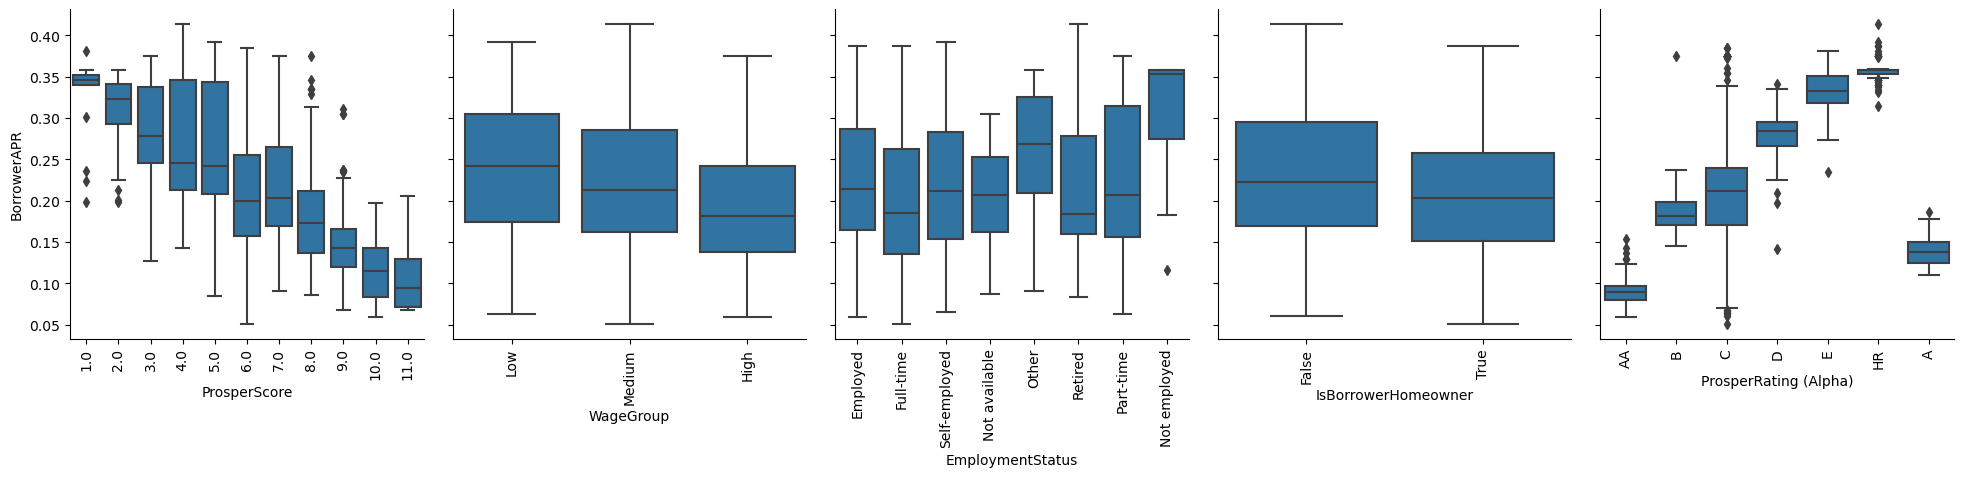

In [160]:
#plot multiple figures with Pairgrid
g = sns.PairGrid(data = df_samp, y_vars = ['BorrowerAPR'], 
                x_vars = ['ProsperScore','WageGroup','EmploymentStatus','IsBorrowerHomeowner', 'ProsperRating (Alpha)'], height = 4)
g.map(boxgrid)
plt.show()

_**Notes**_ 

The same conclusion can be deduced from the figures above. There is a strong relation between the annual cost of a loan to a borrower and prosper score&rating, salary, employment and collateral. 

#### conclusion 
- There is a moderate and negative correlation between interest rate and Loan amount.
- I found also that there are some negative and strong relationships between the categorical/ordinal variables selected and the interest rate. As an example, Unemployed people have more restrictive credit condition (higher rate) than the people who have jobs. The second factor is that borrowers who have collaterals(or homeowners) have lower rates than those who doesn't have any collateral(house).The third determinant is that borrowers with higher monthly salaries tend to get a lower lending interest rate. So it's a good determinant as well.
- Similarly, there is a strong indication that the Prosper score and rating is an excellent determinant factor of borrower's rate. We can conclude that the higher the score , the lower the rate. In other words, borrowers with AA prosper ratings could expect an APR that will likely fall into the 2-15% range, whereas borrowers with bad ratings (HR) could expect their interest rate to go as high as 40%!

## Multivariate Exploration

> In this section, i am going to dig deeper by Creating plots of three or more variables to investigate the determinant of interest rate and loans even further. 

### Borrower Rate and Average Credit Score by delinquency Status

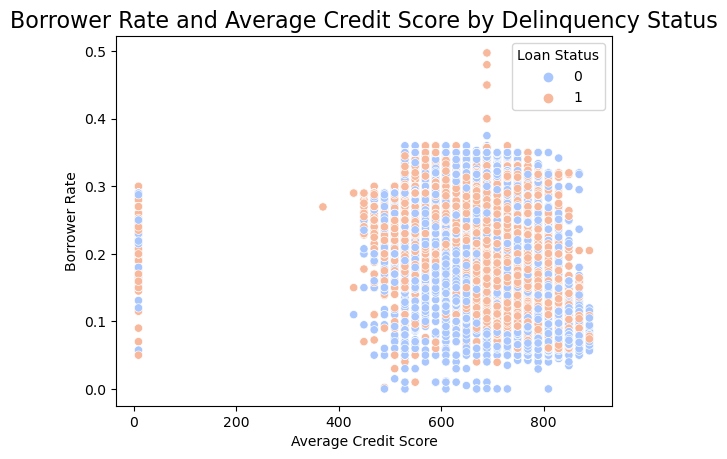

In [168]:
# Plot Borrower Rate and Average Credit Score by Delinquency Status
sns.scatterplot(data=df_selected, x='AverageCreditScore', y='BorrowerRate', hue='LoanStatus', palette='coolwarm')

# Customize plot
plt.title('Borrower Rate and Average Credit Score by Delinquency Status', fontsize=16)
plt.xlabel('Average Credit Score')
plt.ylabel('Borrower Rate')
plt.legend(title='Loan Status')
plt.show()


### Borrower Rate by Prosper rating and Loan terms

C:\Users\HP\AppData\Local\Temp\ipykernel_33180\2871697400.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.pointplot(data = df_selected, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',


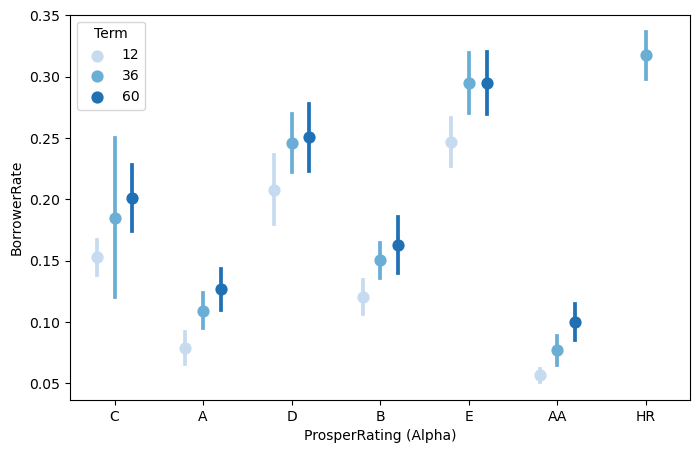

In [173]:
#plot pointplot 
fig = plt.figure(figsize = [8,5])
ax = sns.pointplot(data = df_selected, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '',dodge = 0.4, ci='sd')

_**Notes**_

We note that the rates applied on 5-year loans are generally higher than the rates applied on other maturities, regardless of the prosper rating (with the exception of the E rating (same rates for 3 and 5 years loans ) and the HR rating).
This is obvious, when the duration is longer it increases the risk of this operation involving a rise in rates. 
Of course, as it is always mentioned, the rates are the lowest, for individuals with a good rating.
Interestingly, for HR rating, only 3 years loans are observed in this dataset.

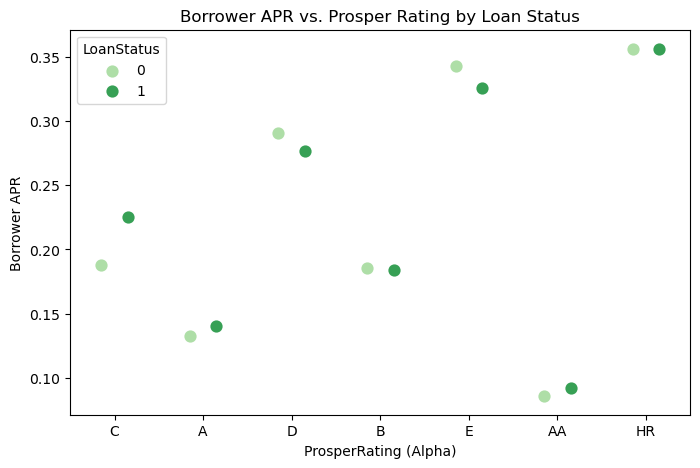

In [175]:
fig = plt.figure(figsize = [8,5])
ax = sns.pointplot(data = df_selected, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Greens', linestyles = '', dodge = 0.3)
plt.title('Borrower APR vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower APR')
plt.show();

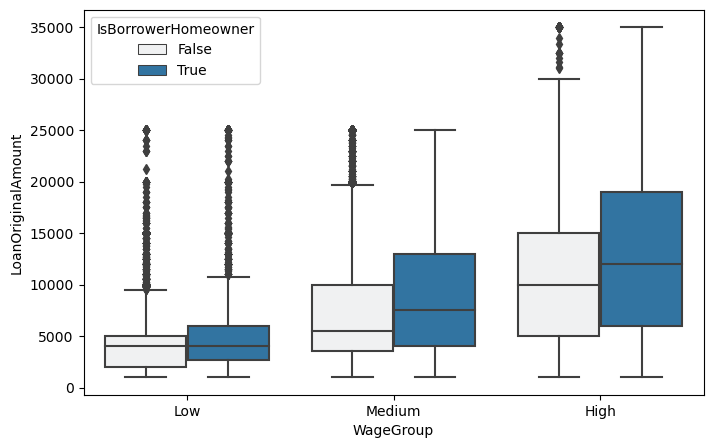

In [177]:
#plot boxplot
plt.figure(figsize = [8,5])
sns.boxplot(data = df_selected, x = 'WageGroup', y = 'LoanOriginalAmount',hue = 'IsBorrowerHomeowner' ,color = color_base);

_**Notes**_

As shown in the previous section, having a collateral and a higher wage help getting higher loan amount.
It is clearly visible that being a home owner is a very important element to get a higher loan amount.

## Conclusion on the Relationships Between Various Variables in the Data
In this exploratory analysis of Prosper loan data, several key relationships and insights were uncovered that highlight various factors influencing loan outcomes:

- 1 Loan Status (Default vs. Non-Default):
A significant portion of loans in the dataset are in default (delinquent or closed due to non-payment). This suggests a high risk of default, with many borrowers facing financial difficulties or not meeting repayment obligations.
Loans marked as defaulted are likely to have high delinquency, particularly those where the loan status was influenced by the "LoanCurrentDaysDelinquent" exceeding 180 days.
Prosper Score:

- 2 The ProsperScore, which assesses borrower risk, is largely bell-shaped with a spike at score 6. This indicates that most borrowers fall into the medium risk category, with fewer borrowers at either extreme (highest or lowest risk).This score is useful for assessing the likelihood of loan repayment, with borrowers in lower score brackets presenting higher risk.

- 3 Debt-to-Income Ratio: The Debt-to-Income Ratio (DTI) is an important indicator of borrower financial health. Most borrowers exhibit a DTI around 30%, which suggests a reasonable balance between income and debt. However, the right-skewed distribution indicates that some borrowers have an exceptionally high DTI, which may correlate with a higher likelihood of default.

- 4 Employment Status:A large proportion of borrowers are employed, which is expected since employment stability is a key factor in loan eligibility. However, the data also includes a smaller proportion of borrowers listed as self-employed or unemployed, which may suggest higher risk categories.

- 5 Occupation:The Occupation variable shows that many borrowers are in professional or administrative roles, such as teachers, analysts, or programmers. This may indicate a trend where individuals with higher educational or professional backgrounds prefer using alternative lending platforms like Prosper for better interest rates compared to traditional banks.


- 6 Loan Category:Debt Consolidation is the most common loan category, which aligns with the general purpose of P2P lending platforms—helping borrowers consolidate high-interest debt into more manageable terms. Other notable loan categories include business and personal loans, with the popularity of debt consolidation being unsurprising given the nature of the loans.

- 7 Loan Original Amount:The Loan Original Amount distribution shows that the most common loan amounts are clustered around $4,000, $10,000, and $15,000, which may suggest that borrowers generally seek moderate-sized loans. The distribution is right-skewed, indicating that higher loan amounts are less frequent but still significant.

- 8 Term of Loans:The majority of loans have a term of 3 years, followed by 5 years, with shorter-term loans being less common. This suggests that borrowers generally prefer medium-term repayment schedules, likely for better affordability compared to shorter-term, higher monthly repayment loans.

- 9 Wage Group:The Wage Group classification shows that most borrowers fall into the Medium Income group, with a smaller portion in the Low and High income categories. The income distribution highlights that P2P borrowers tend to have an average income, which might be due to the interest rates that cater to individuals who do not qualify for traditional bank loans.

- Overall Insights:
Higher risk of default is observed across various segments, particularly for loans with high debt-to-income ratios or low Prosper Scores.
Debt consolidation remains the dominant loan purpose, and loans of moderate size (around $4,000 to $15,000) are the most common.
Income levels and employment status appear to have an impact on borrowing patterns, with borrowers from medium income groups dominating the loan market.